# Project: No-Show Appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from more than 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
### Research Questions:
- What is the overall percentage of patients who show or no-show at the scheduled appointments?
- Does patient's gender has any impact on his commitment to the scheduled appointment?
- Is being Diabetic makes the patient more likely to commit with the scheduled appointments or not?
- What is the distribution of patients Age and the attendence rate?
- Does waiting days between Scheduled Day Appointment Day has any impact on patients commitment?
- Will receiving a remnider SMS affects the patients attendence at their appointments?

<a id='wrangling'></a>
## Data Wrangling

Data provided in a csv file.

### General Properties
- Import packages (pandas, numpy, matplotlib) to investigate and visualize data.
- Investigating the data by using functions as (head, shape, describe, info)

In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape

(110527, 14)

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64



#### After accessing data it was obseved that:
- There are 2 unnecessary columns in analysis, so they will be dropped.
- For usability in the analysis process: rename No-show column to Show & reverse the values and replace them with int.
- change type of ScheduledDay & AppointmentDay to datetime data type.
- There is a negative value in age, so it will be dropped




### Data Cleaning 

In [9]:
# drop the unnecessary columns
df = df.drop(['PatientId', 'AppointmentID'], axis=1)

In [10]:
# test 
df.shape

(110527, 12)

In [11]:
# rename No-show column to Show
df = df.rename(columns={'No-show': 'Show'}, inplace=False)
# reverse & change 'Show' column's values 
df['Show'].replace(to_replace=['No', 'Yes'], value=[1, 0], inplace=True)

In [12]:
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1


In [13]:
# change type of ScheduledDay & AppointmentDay to datetime data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [14]:
# test
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  Show            110527 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(8), object(2)
memory usage: 10.1+ MB


In [15]:
# finding the row with Age value -1
df.loc[df['Age'] == -1]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [16]:
# dropping the row with Age value 0
df = df.drop(df.index[99832])

In [17]:
# test
df.shape

(110526, 12)

<a id='eda'></a>
## Exploratory Data Analysis







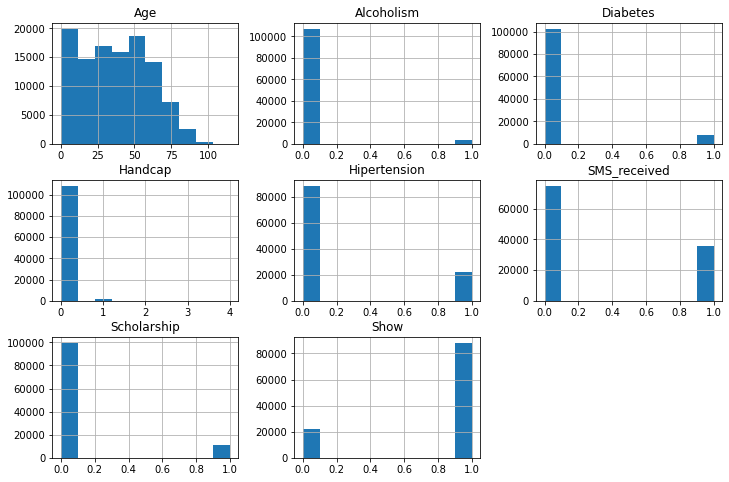

In [18]:
# general visualization for better understanding of the data
df.hist(figsize=(12, 8));

### Research Question 1:
#### What is the overall percentage of patients who show or no-show at the scheduled appointments?

In [19]:
# count no. of all show & no-show patient
df['Show'].value_counts()

1    88207
0    22319
Name: Show, dtype: int64

In [20]:
# calculate the percentage of patients who attend at the appointment
show = df['Show'] == 1
show_percent = show.mean()

# calculate the percentage of patients who didn't attend at the appointment
no_show = df['Show'] == 0
no_show_percent = no_show.mean()

print(show_percent, no_show_percent)

0.7980656135208005 0.20193438647919945


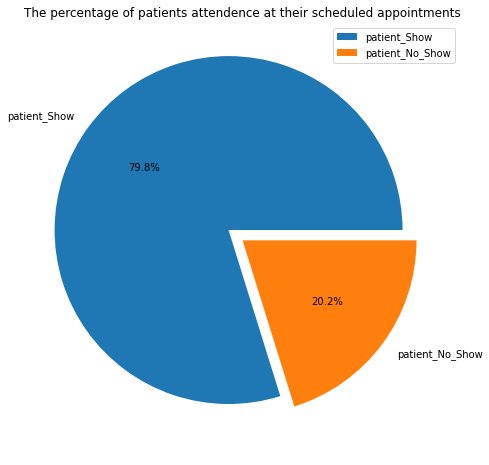

In [21]:
# visualize the percent of show/no-show patients
plt.subplots(figsize=(12,8))
plt.pie([show_percent, no_show_percent], labels=['patient_Show', 'patient_No_Show'], explode=[0.1, 0], autopct='%1.1f%%')
plt.title('The percentage of patients attendence at their scheduled appointments')
plt.legend(loc="upper right");

###### From pie chart we noticed that there are 20.2%  of patients Not-Show at their Scheduled appointments.





### Research Question 2:
#### Does patient's gender has any impact on his commitment to the scheduled appointment?


In [22]:
# count no. of patients by their gender
gender_no = df['Gender'].value_counts()
gender_no

F    71839
M    38687
Name: Gender, dtype: int64

In [23]:
# count no. of patients shown or no-shown by their gender
att_gender = df['Gender'].groupby(df['Show']).value_counts()
att_gender

Show  Gender
0     F         14594
      M          7725
1     F         57245
      M         30962
Name: Gender, dtype: int64

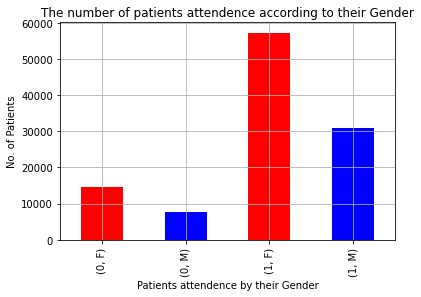

In [24]:
# plotting the count of show/no-show patients according to their gender
att_gender.plot(kind='bar', color=['red', 'blue'], grid=True)
plt.title('The number of patients attendence according to their Gender')
plt.xlabel('Patients attendence by their Gender')
plt.ylabel('No. of Patients');

In [25]:
# count total number of females patients
total_females = df[df.Gender == 'F'].shape[0]

# count number of females patient who shown at the appointment
females_show = len(df.loc[(df.Gender == "F") & (df.Show == 1)])

# count number of females patient who not-shown at the appointment
females_no_show = len(df.loc[(df.Gender == "F") & (df.Show == 0)])

print(total_females, females_show, females_no_show)

71839 57245 14594


In [26]:
# count total number of males patients
total_males = df[df.Gender == 'F'].shape[0]

# count number of males patient who shown at the appointment
males_show = len(df.loc[(df.Gender == "M") & (df.Show == 1)])

# count number of males patient who not-shown at the appointment
males_no_show = len(df.loc[(df.Gender == "M") & (df.Show == 0)])

print(total_males, males_show, males_no_show)

71839 30962 7725


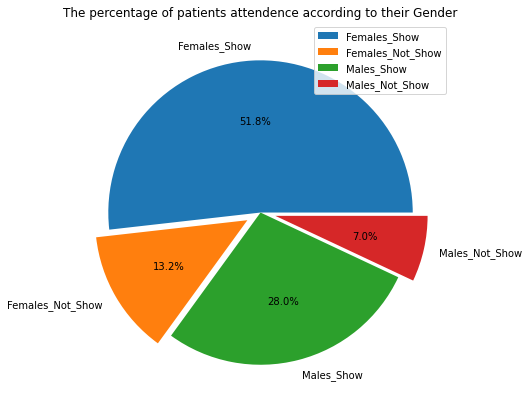

In [53]:
# visualize the percent of show/no-show patients according to their gender
plt.subplots(figsize=(15,7))
plt.pie([females_show, females_no_show, males_show, males_no_show], explode=[0, 0.1, 0, 0.1], 
        labels=['Females_Show', 'Females_Not_Show', 'Males_Show', 'Males_Not_Show'], autopct='%1.1f%%')
plt.title('The percentage of patients attendence according to their Gender')
plt.legend(loc="upper right");

###### From pie chart it seems that Gender doesn't has that much impact on patients attendence.



### Research Question 3:
#### Is being Diabetic makes the patient more likely to commit with the scheduled appointments or not?

In [28]:
# count total number of Diabetic patients
total_diabetes = df[df.Diabetes == 1].shape[0]

# count number of dibetic patients who shown at the appointment
diabetes_show = df.query('Diabetes == 1 & Show == 1').shape[0]

# count number of dibetic patients who not-shown at the appointment
diabetes_no_show = df.query('Diabetes == 1 & Show == 0').shape[0]

print(total_diabetes, diabetes_show, diabetes_no_show)

7943 6513 1430


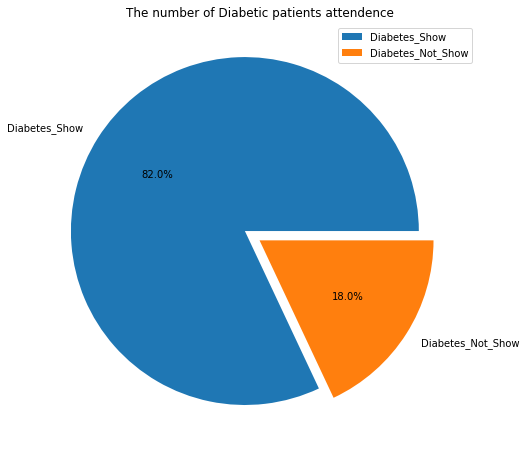

In [29]:
plt.subplots(figsize=(12,8))
plt.pie([diabetes_show, diabetes_no_show], labels=['Diabetes_Show', 'Diabetes_Not_Show'], explode=[0.1, 0], autopct='%1.1f%%')
plt.title('The number of Diabetic patients attendence')
plt.legend(loc="upper right");

###### 82% of diabetic patients shown at their appointments, while only 18% hadn't show.


### Research Question 4:
#### What is the distribution of patients Age and the attendence rate?

In [30]:
# create mask for patients who show & no-show
shown = df['Show'] == 1
no_shown = df['Show'] == 0

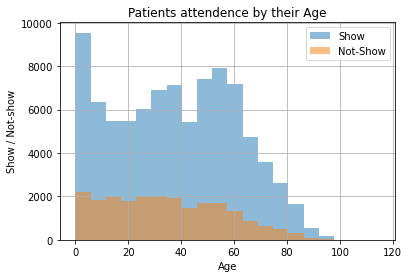

In [31]:
# visualize all patients attendence by their age
df.Age[shown].hist(label='Show', alpha=0.5, bins=20)
df.Age[no_shown].hist(label='Not-Show', alpha=0.5, bins=20)
plt.title('Patients attendence by their Age')
plt.xlabel('Age')
plt.ylabel('Show / Not-show')
plt.legend();

In [32]:
df.Age[shown].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [33]:
df.Age[no_shown].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

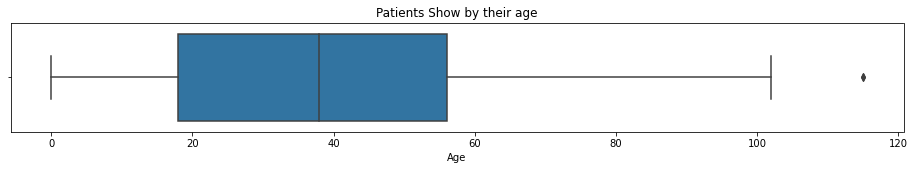

In [34]:
# visualize patients who shown at their appointment by their age
age_show = df.Age[shown]
plt.figure(figsize=(16,2))
_ = sns.boxplot(x=age_show)
plt.title('Patients Show by their age');

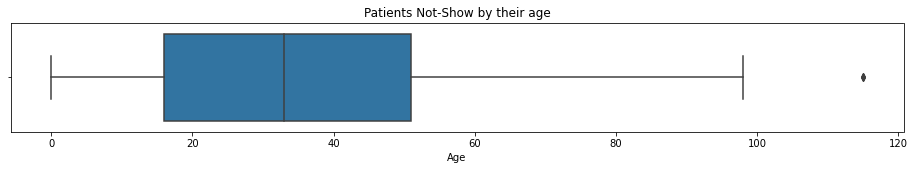

In [35]:
# visualize patients who not-shown at their appointment by their age
age_no_show = df.Age[no_shown]
plt.figure(figsize=(16,2))
_ = sns.boxplot(x=age_no_show)
plt.title('Patients Not-Show by their age');

###### It's obvois that the Age has an effect on the patient commitment to their appointment.


### Research Question 5:
#### Does waiting days between Scheduled Day Appointment Day has any impact on patients commitment?

In [36]:
# create a new df which contain the appointment data & show & adding column th show the patient's waiting period 
schedule_df = df[['ScheduledDay', 'AppointmentDay', 'Show']].copy()
schedule_df['WaitingTime'] = df['AppointmentDay'] - df['ScheduledDay']
schedule_df.head(5)

,ScheduledDay,AppointmentDay,Show,WaitingTime
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,1,-1 days +05:21:52
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,1,-1 days +07:51:33
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,1,-1 days +07:40:56
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,1,-1 days +06:30:29
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,1,-1 days +07:52:37


In [37]:
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 1   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 2   Show            110526 non-null  int64              
 3   WaitingTime     110526 non-null  timedelta64[ns]    
dtypes: datetime64[ns, UTC](2), int64(1), timedelta64[ns](1)
memory usage: 4.2 MB


In [38]:
schedule_df.head()

,ScheduledDay,AppointmentDay,Show,WaitingTime
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,1,-1 days +05:21:52
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,1,-1 days +07:51:33
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,1,-1 days +07:40:56
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,1,-1 days +06:30:29
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,1,-1 days +07:52:37


In [39]:
# convert WaitingTime column to str and execlude the waiting days only
schedule_df['WaitingTime'] = schedule_df['WaitingTime'].astype(str).str[0:3]
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 1   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 2   Show            110526 non-null  int64              
 3   WaitingTime     110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(1), object(1)
memory usage: 4.2+ MB


In [40]:
schedule_df.head()

,ScheduledDay,AppointmentDay,Show,WaitingTime
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,1,-1
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,1,-1
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,1,-1
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,1,-1
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,1,-1


In [41]:
schedule_df['WaitingTime'].value_counts()

-1     38562
1 d     6725
3 d     5290
0 d     5213
6 d     4906
       ...  
100        1
124        1
126        1
125        1
131        1
Name: WaitingTime, Length: 131, dtype: int64

In [42]:
# strip letter 'd' from the column
schedule_df['WaitingTime'] = schedule_df['WaitingTime'].map(lambda x: x.rstrip('d'))
schedule_df['WaitingTime'].value_counts()

-1     38562
1       6725
3       5290
0       5213
6       4906
       ...  
116        1
122        1
138        1
125        1
100        1
Name: WaitingTime, Length: 131, dtype: int64

In [43]:
# convert WaitingTime column to int and to replace numeric values
schedule_df['WaitingTime'] = pd.to_numeric(schedule_df['WaitingTime'])
schedule_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 1   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 2   Show            110526 non-null  int64              
 3   WaitingTime     110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(2)
memory usage: 4.2 MB


In [44]:
# replace '-1' by '0' considering that the sceduledDay and appointmentDay are the same
schedule_df['WaitingTime'].replace(to_replace= -1, value= 0, inplace=True) 
schedule_df['WaitingTime'].value_counts()

 0      43775
 1       6725
 3       5290
 6       4906
 5       4037
        ...  
 145        1
-7          1
 81         1
 116        1
 126        1
Name: WaitingTime, Length: 130, dtype: int64

In [45]:
# noticed value '-7' so, I'll drop it
schedule_df.drop(schedule_df.index[schedule_df['WaitingTime'] == -7], inplace=True)

In [46]:
schedule_df['WaitingTime'].value_counts()

0      43775
1       6725
3       5290
6       4906
5       4037
       ...  
150        1
116        1
124        1
125        1
131        1
Name: WaitingTime, Length: 129, dtype: int64

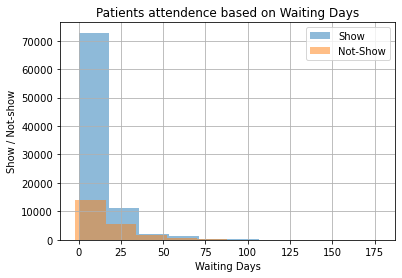

In [47]:
schedule_df.WaitingTime[shown].hist(label='Show', alpha=0.5)
schedule_df.WaitingTime[no_shown].hist(label='Not-Show', alpha=0.5)
plt.title('Patients attendence based on Waiting Days')
plt.xlabel('Waiting Days')
plt.ylabel('Show / Not-show')
plt.legend();

###### It's obvois that the long waiting has a negative effect on the patient commitment to the appointment.


### Research Question 6:
#### Will receiving a reminder SMS affects the patients attendence at their appointments?

In [48]:
# count total number of patients who received a reminder sms
total_sms = df[df.SMS_received == 1].shape[0]

# count number of patients who received a reminder sms & shown at the appointment
sms_show = df.query('SMS_received == 1 & Show == 1').shape[0]

# count number of patients who received a reminder sms & not-shown at the appointment
sms_no_show = df.query('SMS_received == 1 & Show == 0').shape[0]

print(total_sms, sms_show, sms_no_show)

35482 25698 9784


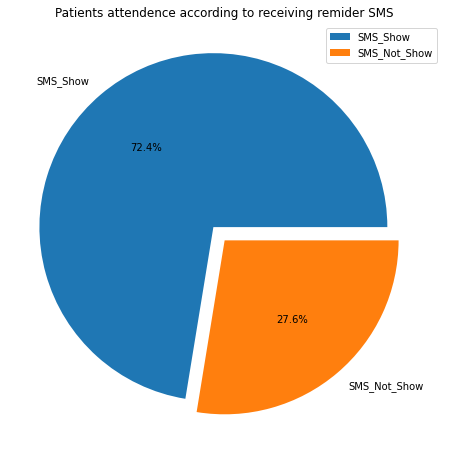

In [49]:
plt.subplots(figsize=(12,8))
plt.pie([sms_show, sms_no_show], labels=['SMS_Show', 'SMS_Not_Show'], explode=[0.1, 0], autopct='%1.1f%%')
plt.title('Patients attendence according to receiving remider SMS')
plt.legend(loc="upper right");

###### 72.4% of  patients who received a SMS shown at their appointments, while only 27.6% of patient hadn't show.

<a id='conclusions'></a>
 
 


## Conclusions
###### After investigating more than 100k patients' s appointments record, there are 20.2%  of patients didn't show at theire scheduled appointments.

###### After analysing factors wich seem to impact the patiens commitment, I deduced that:
- The patients commitment not influnced by being male or female.
- patients who suffer from diabetes shows more obligation to the appointment, as only 18% of diabetic patients didn't show at the scheduled appointments.
- It's obvoised that the patients' age(at dedicated ages) has highly impact on their commitment to their appointments.
- The longer time it takes to dedicate a schedule day, the lower the probability that the patient will show at time.
- Sending a reminder SMS has highly influnce on patient to show at time, thus 27.6 of patient didn't show.

##### Analysis limitation: 
- There must be more investigation on patient's age and categorize them to(baby, kid, toddledr, adult, senior)

##### Reaserch limitation: I think the study need to include more infrmation to enrich it  as:
- Level of physical fitness.
- Does the patient work?
- Medical history for patient's family.
- Marital status.
- Obesity level.